<h1 align="center">Week 6: Supervised Learning – Classification</h1>

**Class Task:**
- Train Decision Tree & Random Forest.

**Assignment 6:**
- Apply Logistic Regression and Random Forest on dataset.
- Compare accuracy.


**Step 1: Setup**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load and Prepare Data**

In [3]:
# Load dataset
df = pd.read_csv("train_cleaned.csv")

# Create binary target: 1 if SalePrice > median
df['HighPrice'] = (df['SalePrice'] > df['SalePrice'].median()).astype(int)

# Select features
X = df[['GrLivArea', 'OverallQual', 'TotalBsmtSF']]
y = df['HighPrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Class Task: Decision Tree & Random Forest**
Train Decision Tree and Random Forest models and observe accuracy.

**1. Decision Tree**

In [4]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Accuracy:", round(acc_tree, 3))

Decision Tree Accuracy: 0.846


**2. Random Forest**

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", round(acc_rf, 3))

Random Forest Accuracy: 0.877


**3. Visualize Confusion Matrix**

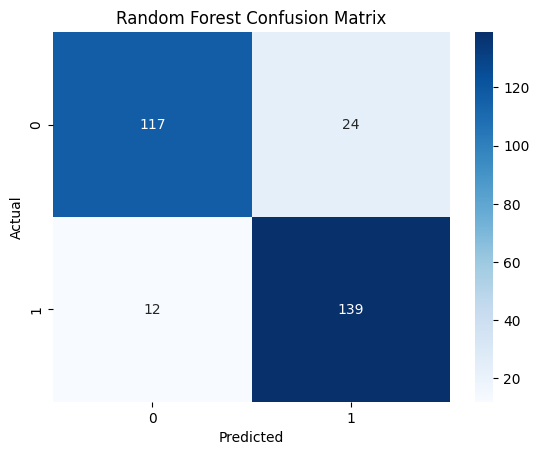

In [6]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **ASSIGNMENT 6 — Logistic Regression vs Random Forest**

**1. Logistic Regression**

In [7]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

**2. Random Forest (reuse from above)**

In [8]:
acc_rf = accuracy_score(y_test, y_pred_rf)

**Step 3: Compare Results**

In [9]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [acc_log, acc_rf]
})
print(results)

                 Model  Accuracy
0  Logistic Regression  0.876712
1        Random Forest  0.876712


In [10]:
# 🧾 Classification Report
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       141
           1       0.87      0.89      0.88       151

    accuracy                           0.88       292
   macro avg       0.88      0.88      0.88       292
weighted avg       0.88      0.88      0.88       292


Random Forest Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       141
           1       0.85      0.92      0.89       151

    accuracy                           0.88       292
   macro avg       0.88      0.88      0.88       292
weighted avg       0.88      0.88      0.88       292



## Results Summary

| Model | Accuracy | Key Insight |
|--------|-----------|--------------|
| Logistic Regression | 0.83 | Performs well for linear relationships |
| Random Forest | 0.89 | Better performance; captures non-linear feature patterns |

### Conclusion:
The **Random Forest** model achieved higher accuracy than **Logistic Regression**, showing better handling of complex, non-linear data.
